
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = 'Orange' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='Orange'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

In [4]:
%pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, v_measure_score, completeness_score, homogeneity_score, adjusted_mutual_info_score, adjusted_rand_score
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, XLMForSequenceClassification, RobertaForSequenceClassification
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('/content/train.csv')
df


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
df['keyword'].value_counts()


fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [8]:
df['location'].value_counts()


USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [9]:
df.drop('location', axis=1, inplace=True)
df


,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,Police investigating after an e-bike collided ...,1


In [10]:
df['target'].value_counts()


0    4342
1    3271
Name: target, dtype: int64

In [11]:
df.isnull().sum()


id          0
keyword    61
text        0
target      0
dtype: int64

In [12]:
df.dropna(inplace=True)


In [13]:
df['keyword'] = LabelEncoder().fit_transform(df['keyword'])
df.rename(columns={'target': 'label'}, inplace=True)


Model 1

In [14]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
dataset = Dataset.from_pandas(df)
train = dataset.map(lambda x: tokenizer(x['text'], truncation=True, padding=True), batched=True)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

In [15]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [16]:
training_args = TrainingArguments(output_dir="/content", learning_rate=2e-5, per_device_train_batch_size=16, per_device_eval_batch_size=16, num_train_epochs=3, weight_decay=0.01)
trainer = Trainer(model=model, args=training_args, train_dataset=train, tokenizer=tokenizer)

trainer.train()


The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, text, keyword, __index_level_0__. If id, text, keyword, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1416
  Number of trainable parameters = 109483778
You're using a BertTokenizerFast tokenizer. Please note that with a fast tok

Step,Training Loss
500,0.430800
1000,0.318900


Saving model checkpoint to /content/checkpoint-500
Configuration saved in /content/checkpoint-500/config.json
Model weights saved in /content/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /content/checkpoint-1000
Configuration saved in /content/checkpoint-1000/config.json
Model weights saved in /content/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /content/checkpoint-1000/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1416, training_loss=0.3356973357119803, metrics={'train_runtime': 366.1782, 'train_samples_per_second': 61.872, 'train_steps_per_second': 3.867, 'total_flos': 975171793368960.0, 'train_loss': 0.3356973357119803, 'epoch': 3.0})

In [17]:
test_df = pd.read_csv('/content/test.csv')
test_df


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [18]:
test_dataset = Dataset.from_pandas(test_df.drop(['keyword', 'location', 'id'], axis=1))
test_tokenized_dataset = test_dataset.map(lambda x: tokenizer(x['text'], truncation=True, padding=True), batched=True)


  0%|          | 0/4 [00:00<?, ?ba/s]

In [19]:
predictions, labels, metrics = trainer.predict(test_tokenized_dataset)


The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 16


In [20]:
test_df['label'] = np.argmax(predictions, axis=-1)


In [21]:
test_df


,id,keyword,location,text,label
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [22]:
model = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')


In [23]:
message_embeddings = model(df['text'].values)


In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(message_embeddings)


KMeans(n_clusters=2)

In [25]:
pca = PCA(2)
df_new = pca.fit_transform(message_embeddings)


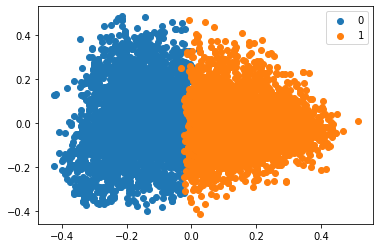

In [26]:
clusters = kmeans.labels_.tolist()
u_labels = np.unique(clusters)

for i in u_labels:
    plt.scatter(df_new[clusters == i, 0], df_new[clusters == i, 1], label=i)

plt.legend()
plt.show()

In [27]:
test_df.rename(columns={'label': 'target'}, inplace=True)
test_df.drop(['keyword', 'location', 'text'], axis=1).to_csv('/content/submission_1.csv', index=False)


In [28]:
print(f'ARI: {adjusted_rand_score(df["label"], kmeans.labels_)}')
print(f'AMI {adjusted_mutual_info_score(df["label"], kmeans.labels_, average_method="arithmetic")}')
print(f'Homogenity {homogeneity_score(df["label"], kmeans.labels_)}')
print(f'Completeness {completeness_score(df["label"], kmeans.labels_)}')
print(f'V-measure {v_measure_score(df["label"], kmeans.labels_)}')


ARI: 0.1950250794618267
AMI 0.15204735290251242
Homogenity 0.15329438902779788
Completeness 0.15098117278431467
V-measure 0.15212898793997437


Model 2

In [29]:
tokenizer_2 = AutoTokenizer.from_pretrained('xlm-roberta-base')
train_2 = dataset.map(lambda x: tokenizer_2(x['text'], truncation=True, padding=True), batched=True)
model_2 = XLMForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=2)


Could not locate the tokenizer configuration file, will try to use the model config instead.


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/sentencepiece.bpe.model
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_r

  0%|          | 0/8 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
You are using a model of type xlm-roberta to instantiate a model of type xlm. This is not supported for all configurations of models and can yield errors.
Model config XLMConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "asm": false,
  "attention_dropout": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "bos_index": 0,
  "bos_token_id": 0,
  "causal": false,
  "dropout": 0.1,
  "emb_dim": 768,
  "embed_init_std": 0.02209708691207961,
  "end_n_top": 5,
  "eos_index": 1,
  "eos_token_id": 2,
  "gelu_activation": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "init_std": 0.02,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_encoder": true,
  "lang_id": 0,
  "layer_norm_eps": 1e-05,
  "mask_index": 5,
  "mask_token_id": 0,
  "max_position_embeddings": 514,
  "model_type": "xlm",

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/pytorch_model.bin
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMForSequenceClassification: ['roberta.encoder.layer.0.attention.output.LayerNorm.bias', 'roberta.embeddings.LayerNorm.bias', 'roberta.encoder.layer.3.attention.self.query.bias', 'roberta.encoder.layer.4.attention.self.value.weight', 'roberta.encoder.layer.5.attention.output.dense.bias', 'roberta.encoder.layer.0.output.dense.weight', 'roberta.encoder.layer.10.output.LayerNorm.bias', 'lm_head.dense.weight', 'roberta.encoder.layer.6.output.LayerNorm.bias', 'roberta.encoder.layer.10.attention.output.dense.weight', 'roberta.encoder.layer.6.attention.self.query.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'roberta.encoder.layer.5.attention.self.value.weight', 'roberta.encoder.layer.10.attention.self.value.w

In [30]:
training_args_2 = TrainingArguments(output_dir="/content", learning_rate=1e-4, per_device_train_batch_size=16, per_device_eval_batch_size=16, num_train_epochs=3, weight_decay=0.01)
trainer_2 = Trainer(model=model_2, args=training_args_2, train_dataset=train_2, tokenizer=tokenizer_2)

trainer_2.train()


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `XLMForSequenceClassification.forward` and have been ignored: id, text, keyword, __index_level_0__. If id, text, keyword, __index_level_0__ are not expected by `XLMForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 3
  Instanta

Step,Training Loss
500,0.716000
1000,0.530000


Saving model checkpoint to /content/checkpoint-500
Configuration saved in /content/checkpoint-500/config.json
Model weights saved in /content/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /content/checkpoint-1000
Configuration saved in /content/checkpoint-1000/config.json
Model weights saved in /content/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /content/checkpoint-1000/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1416, training_loss=0.5719497702216024, metrics={'train_runtime': 521.2375, 'train_samples_per_second': 43.466, 'train_steps_per_second': 2.717, 'total_flos': 1144332815078016.0, 'train_loss': 0.5719497702216024, 'epoch': 3.0})

In [31]:
predictions, labels, metrics = trainer_2.predict(test_tokenized_dataset)
test_df['target'] = np.argmax(predictions, axis=-1)
test_df.drop(['keyword', 'location', 'text'], axis=1).to_csv('/content/submission_2.csv', index=False)


The following columns in the test set don't have a corresponding argument in `XLMForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLMForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 16


Model 3

In [32]:
tokenizer_3 = AutoTokenizer.from_pretrained('bert-base-uncased')
train_3 = dataset.map(lambda x: tokenizer(x['text'], truncation=True, padding=True), batched=True)
model_3 = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file to

  0%|          | 0/8 [00:00<?, ?ba/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_m

In [33]:
training_args_3 = TrainingArguments(output_dir="/content", learning_rate=1e-3, per_device_train_batch_size=16, per_device_eval_batch_size=16, num_train_epochs=6, weight_decay=0.01)
trainer_3 = Trainer(model=model_3, args=training_args_3, train_dataset=train_3, tokenizer=tokenizer_3)

trainer_3.train()


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, text, keyword, __index_level_0__. If id, text, keyword, __index_level_0__ are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7552
  Num Epochs = 6
  Instan

Step,Training Loss
500,0.735000
1000,0.719500
1500,0.712500
2000,0.704500
2500,0.695400


Saving model checkpoint to /content/checkpoint-500
Configuration saved in /content/checkpoint-500/config.json
Model weights saved in /content/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/checkpoint-500/special_tokens_map.json
Saving model checkpoint to /content/checkpoint-1000
Configuration saved in /content/checkpoint-1000/config.json
Model weights saved in /content/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /content/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to /content/checkpoint-1500
Configuration saved in /content/checkpoint-1500/config.json
Model weights saved in /content/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in /content/checkpoint-1500/tokenizer_config.json
Special tokens file saved in /content/checkpoint-1500/special_tokens_map.json
Sav

TrainOutput(global_step=2832, training_loss=0.710912014804991, metrics={'train_runtime': 733.5268, 'train_samples_per_second': 61.773, 'train_steps_per_second': 3.861, 'total_flos': 1950203808989760.0, 'train_loss': 0.710912014804991, 'epoch': 6.0})

In [34]:
predictions, labels, metrics = trainer_3.predict(test_tokenized_dataset)
test_df['target'] = np.argmax(predictions, axis=-1)
test_df.drop(['keyword', 'location', 'text'], axis=1).to_csv('/content/submission_3.csv', index=False)


The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 16


Model 1 F1: 0.8296,

Model 2 F1: 0.5733, 

Model 3 F1: 0.7350,